In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Hotel_bookings 2.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format='%d/%m/%Y')

In [7]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [8]:
for col in df.describe(include='object').columns: 
    print(col) 
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.drop(['company','agent'], axis=1, inplace=True) 
df.dropna(inplace=True)

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


<Axes: ylabel='adr'>

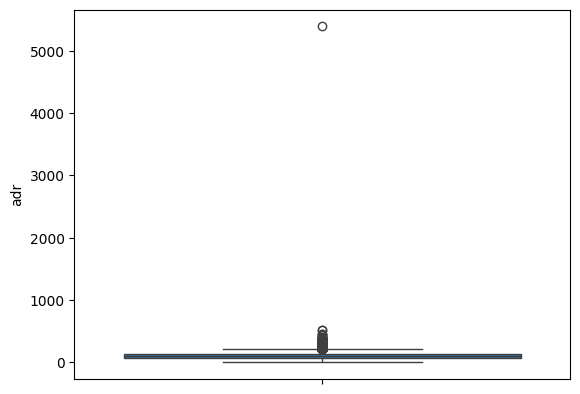

In [12]:
sns.boxplot(df['adr'])

In [13]:
df = df[df['adr'] < 5000]

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64


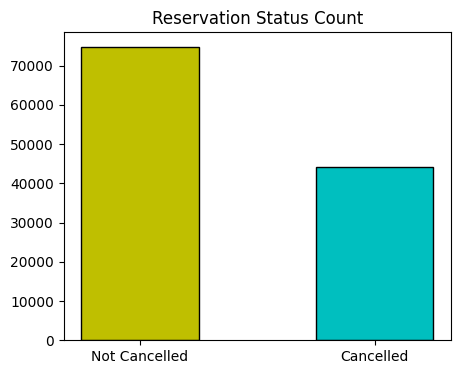

In [34]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)*100
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not Cancelled','Cancelled'], df['is_canceled'].value_counts(), edgecolor='k', color= ['y','c'], width=0.5)
plt.savefig(r'C:\Users\Kumar Deepak\OneDrive\Desktop\PPT.jpg')
plt.show()


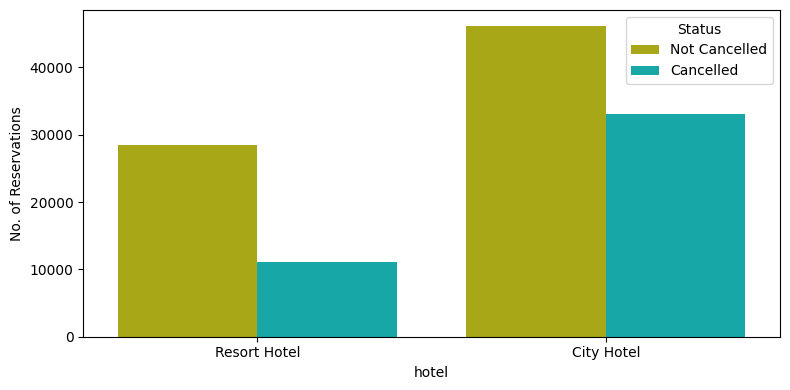

In [52]:
plt.figure(figsize = (8,4) )                    
ax = sns.countplot(x='hotel',hue='is_canceled',data=df,palette=['y','c'])
handles,labels  = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=['Not Cancelled', 'Cancelled'], title='Status')
plt.ylabel('No. of Reservations')
plt.tight_layout()
plt.savefig(r'C:\Users\Kumar Deepak\OneDrive\Desktop\PPT1.png')
plt.show()

In [16]:
Resort_hotel = df[df['hotel'] == 'Resort Hotel'] 
Resort_hotel['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    72.024952
1    27.975048
Name: proportion, dtype: float64

In [17]:
City_hotel = df[df['hotel'] == 'City Hotel'] 
City_hotel['is_canceled'].value_counts(normalize=True)*100

is_canceled
0    58.291825
1    41.708175
Name: proportion, dtype: float64

In [18]:
Resort_hotel = Resort_hotel.groupby('reservation_status_date').agg({'adr': 'mean'})
City_hotel = City_hotel.groupby('reservation_status_date').agg({'adr': 'mean'})

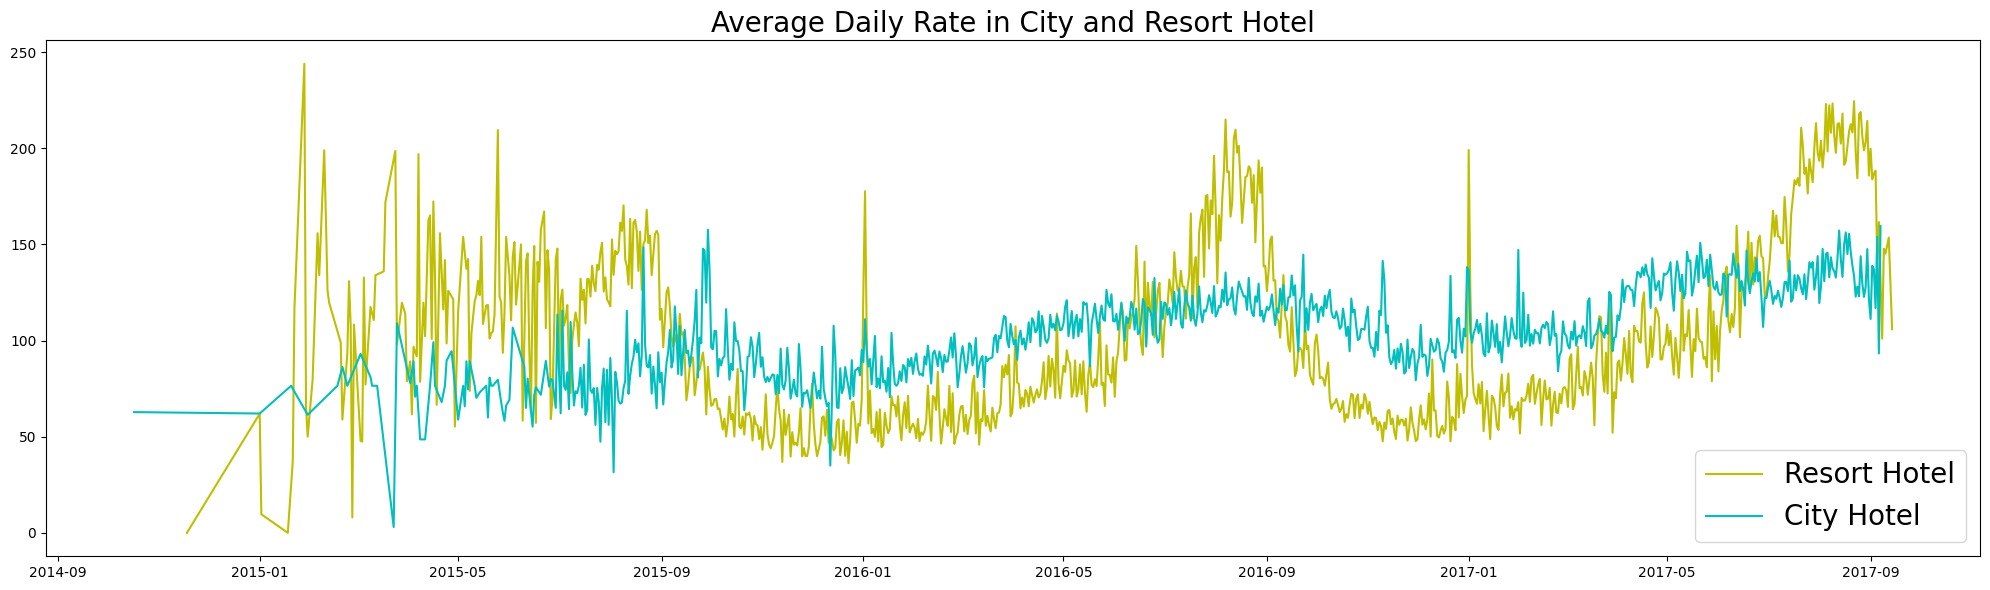

In [46]:
plt.figure(figsize=(20,6))
plt.plot(Resort_hotel.index, Resort_hotel['adr'],label = 'Resort Hotel',color = 'y')
plt.plot(City_hotel.index, City_hotel['adr'],label = 'City Hotel', color='c')
plt.legend(fontsize=20)
plt.title('Average Daily Rate in City and Resort Hotel', fontsize=20)
plt.tight_layout()
plt.savefig(r'C:\Users\Kumar Deepak\OneDrive\Desktop\PPT.png')
plt.show()

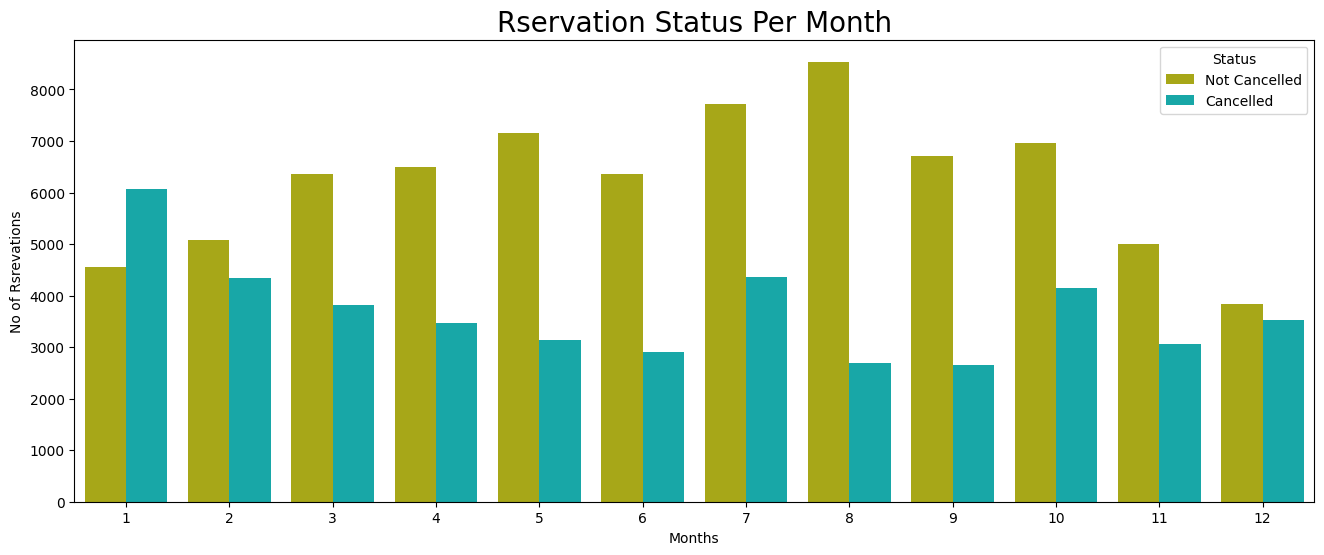

In [64]:
df['Reservation Month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,6))
ax1 = sns.countplot(x='Reservation Month', hue='is_canceled', data=df, palette=['y','c'])
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles,labels=['Not Cancelled', 'Cancelled'],title = 'Status') 
plt.title('Rservation Status Per Month', fontsize = 20)
plt.xlabel('Months')
plt.ylabel('No of Rsrevations')
plt.savefig(r'C:\Users\Kumar Deepak\OneDrive\Desktop\PPT4.png')
plt.show()


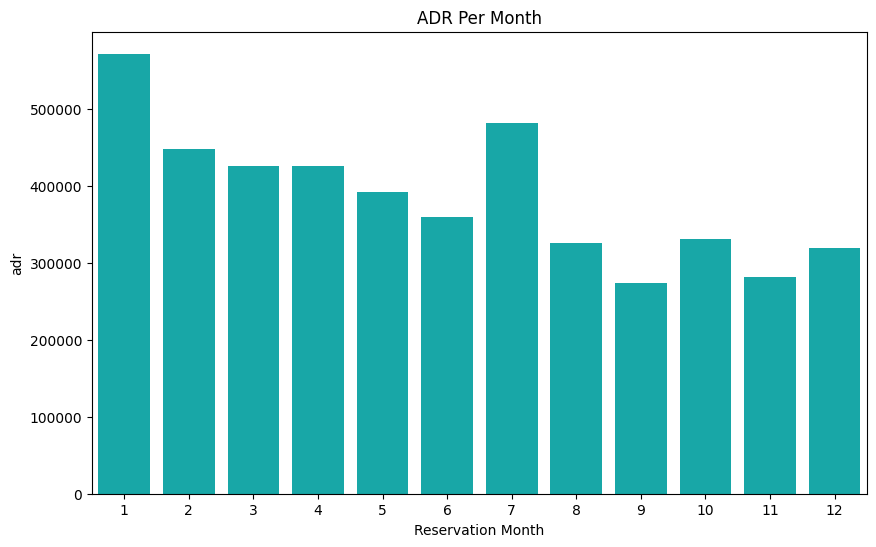

In [62]:
plt.figure(figsize=(10,6))
plt.title('ADR Per Month')
sns.barplot(x='Reservation Month',y='adr',data=df[df['is_canceled'] == 1].groupby('Reservation Month').agg({'adr':'sum'}).reset_index(),color='c')
plt.savefig(r'C:\Users\Kumar Deepak\OneDrive\Desktop\PPT3.png')
plt.show()

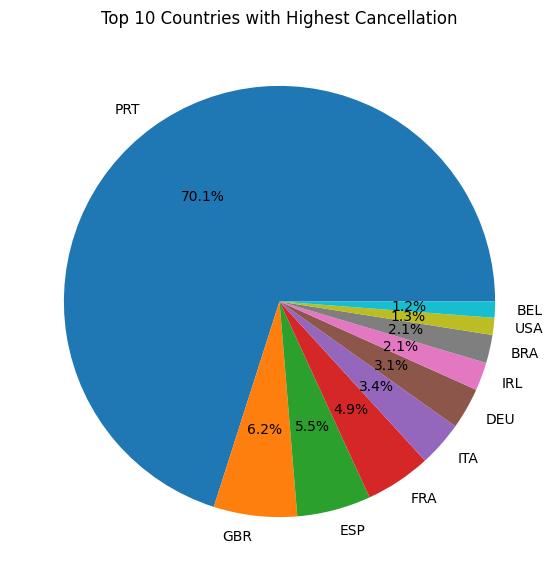

In [60]:
cancelled_data = df[df['is_canceled'] == 1]
Top_10_Countries = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(7,7))
plt.title('Top 10 Countries with Highest Cancellation')
plt.pie(Top_10_Countries,labels=Top_10_Countries.index,autopct='%1.1f%%')
plt.savefig(r'C:\Users\Kumar Deepak\OneDrive\Desktop\PPT2.png')
plt.show()

In [23]:
df['market_segment'].value_counts(normalize=True)*100                  

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64

In [24]:
cancelled_data['market_segment'].value_counts(normalize=True)*100                  

market_segment
Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: proportion, dtype: float64

In [26]:
df['days_in_waiting_list'].value_counts(normalize=True)*100

days_in_waiting_list
0      96.889745
39      0.190922
58      0.137935
44      0.118590
31      0.106815
         ...    
116     0.000841
109     0.000841
37      0.000841
89      0.000841
36      0.000841
Name: proportion, Length: 128, dtype: float64